# Chapter 3. Classification
- github colab : https://homl.info/colab3

In [29]:
# 일단 MNIST전에 이렇게 사전 준비...

import matplotlib
import matplotlib.pyplot # 어째서인지 matplotlib만 import하면 pyplot이 안불러와짐
import pathlib

# https://homl.info/colab3 에서 사용하는 default

matplotlib.pyplot.rc('font', size=14)
matplotlib.pyplot.rc('axes', labelsize=14, titlesize=14)
matplotlib.pyplot.rc('legend', fontsize=14)
matplotlib.pyplot.rc('xtick', labelsize=10)
matplotlib.pyplot.rc('ytick', labelsize=10)

# 저장할 디렉토리 설정
output_dir = pathlib.Path() / "images" / "end_to_end_project"
output_dir.mkdir(parents=True, exist_ok=True)
print(f'output_dir : {output_dir}')

# save_fig 대신 사용할 것
def matplotlib_to_imagefile(output_dir, filename, imgext="png", tight_layout=True, resolution=300):
    path = output_dir / f"{filename}.{imgext}"
    if tight_layout:
        matplotlib.pyplot.tight_layout()
    matplotlib.pyplot.savefig(path, format=imgext, dpi=resolution)

output_dir : images\end_to_end_project


In [8]:
import sklearn.datasets

# https://www.openml.org/search?type=data&sort=runs&status=active 에 보면 
# openml에서 제공하는 여러 dataset들이 있다. mnist_784도 이중에 하나인 모양

# as_frame=True로 하면 pandas의 DataFrame으로 받을 수 있다.
# as_frame=False로 하면 numpy의 ndarray로 받을 수 있다.
# 책에 의하면 image는 Pandas DataFrame과 맞지 않다고 함. 그래서 False임

# data_home으로 cache folder위치를 지정할 수 있음
# default는 ~/scikit_learn_data
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_openml.html

dataset_save_dir = pathlib.Path("datasets")

mnist = sklearn.datasets.fetch_openml('mnist_784', data_home=dataset_save_dir, as_frame=False)

In [12]:
# fetch_openml은 Bunch라는 객체를 반환함
# Bunch는 dict와 비슷한 객체인데, dict처럼 key로 value를 가져오는 것 뿐만 아니라
# attribute로도 value를 가져올 수 있다.
# 즉, mnist.data, mnist.target, mnist.DESCR, mnist.details, mnist.feature_names, mnist.categories

print(type(mnist))
print(mnist.keys())
print(mnist['DESCR'])
print(mnist.DESCR)

<class 'sklearn.utils._bunch.Bunch'>
dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])
**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting 

In [14]:
X, y = mnist.data, mnist.target
print(f'X.shape : {X.shape}')
print(f'y.shape : {y.shape}')

X.shape : (70000, 784)
y.shape : (70000,)


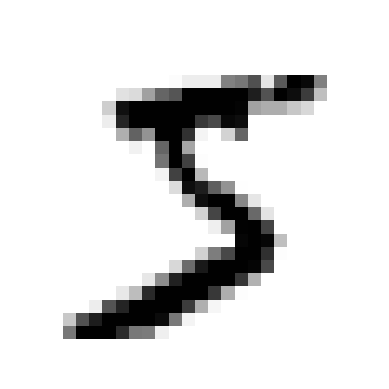

5


In [19]:
import matplotlib.pyplot

# 28 * 28 = 784
def plot_digit(vec_784):
    image = vec_784.reshape(28, 28)
    matplotlib.pyplot.imshow(image, cmap='binary')
    matplotlib.pyplot.axis('off')

some_digit = X[0]
plot_digit(some_digit)
matplotlib.pyplot.show()
print(y[0])

<class 'numpy.ndarray'> 56000 <class 'numpy.ndarray'> 56000


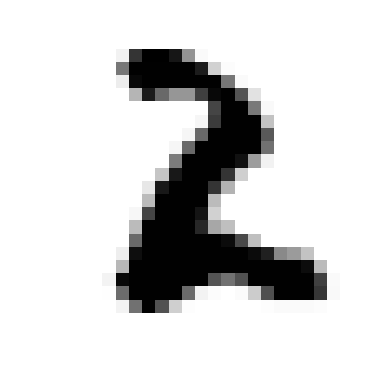

2


In [34]:
import sklearn.model_selection

# 책에는 걍 무식하게 X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
# 이런식으로 나눔
# 뭐 모처럼 train_test_split이라는걸 배웠으니 한번 써봤다
# 근데 앞서 썼을때는 train, test 이런식으로 나눠 졌었는데
# 여기서는 X_train, X_test, y_train, y_test 이런식으로 나눠짐
# train_test_split에 대해서는 다음을 참고하자
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.2, stratify = y)

print(type(X_train), len(X_train), type(y_train), len(y_train))

some_digit = X_train[0]
plot_digit(some_digit)
matplotlib.pyplot.show()
print(y_train[0])

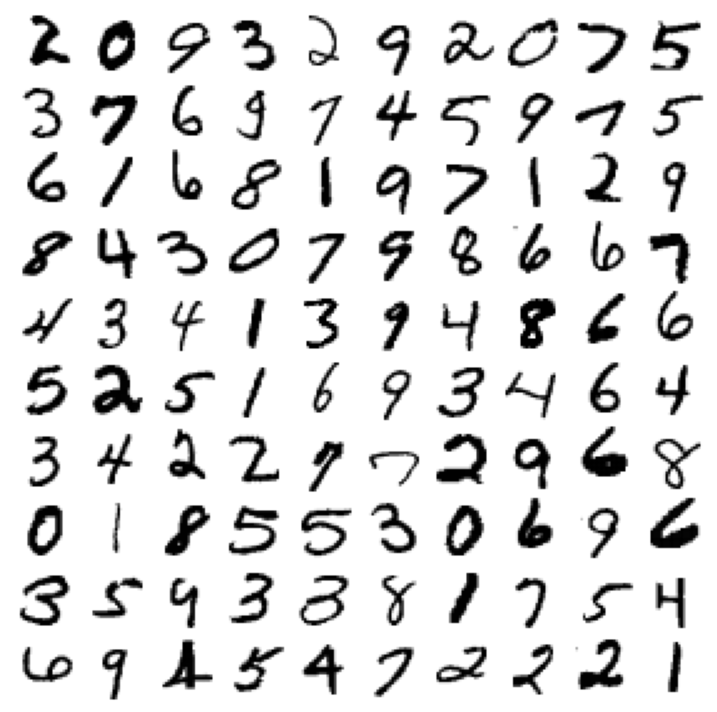

In [35]:
# extra code – this cell generates and saves Figure 3–2
matplotlib.pyplot.figure(figsize=(9, 9))
for idx, image_data in enumerate(X_train[:100]): # X_train을 썼으므로 책과는 다르게 나옴
    matplotlib.pyplot.subplot(10, 10, idx + 1)
    plot_digit(image_data)
    
matplotlib.pyplot.subplots_adjust(wspace=0, hspace=0)
matplotlib_to_imagefile(output_dir, "more_digits_plot", tight_layout=False)
matplotlib.pyplot.show()

## Training a Binary Classifier

- 책에서는 5-detector를 만들어봤지만 나는 3-detector를 만들어 볼것임
- 왜 3인가? 3이 5나 8하고 헷갈릴 여지가 많아 보여서 뭔가 잘 안될것(...) 같으니까
- 책의 5-detector도 어차피 잘 안되는 것 같더만 뭐...

In [39]:
# 참고로 y는 string의 array였음. int가 아니라..
y_train_3 = (y_train == '3')
y_test_3 = (y_test == '3')

In [41]:
import sklearn.linear_model

sgd_clf = sklearn.linear_model.SGDClassifier()
sgd_clf.fit(X_train, y_train_3)

SGDClassifier()

In [45]:
for i in range(10):
    print(f'predict({i}) : {sgd_clf.predict([X_train[i]])} {y_train[i]}')

predict(0) : [False] 2
predict(1) : [False] 0
predict(2) : [False] 9
predict(3) : [ True] 3
predict(4) : [False] 2
predict(5) : [False] 9
predict(6) : [False] 2
predict(7) : [False] 0
predict(8) : [False] 7
predict(9) : [False] 5


In [44]:
for i in range(10):
    print(f'predict({i}) : {sgd_clf.predict([X_test[i]])} {y_test[i]}')

# 대충 돌려봤는데 오 그럭저럭?

predict(0) : [ True] 3
predict(1) : [False] 1
predict(2) : [ True] 3
predict(3) : [False] 3
predict(4) : [False] 1
predict(5) : [False] 9
predict(6) : [False] 6
predict(7) : [False] 8
predict(8) : [False] 5
predict(9) : [False] 4
